Ressources: https://larevueia.fr/support-vector-machines-svm/

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("music.csv")

## Train / test sets

In [2]:
X = df[['zcr', 'spectral_c', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3',
           'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
           'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15',
           'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']]

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Training

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

import matplotlib.pyplot as plt
import numpy as np

model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

Train score :  0.21526908635794745
Test score :  0.185


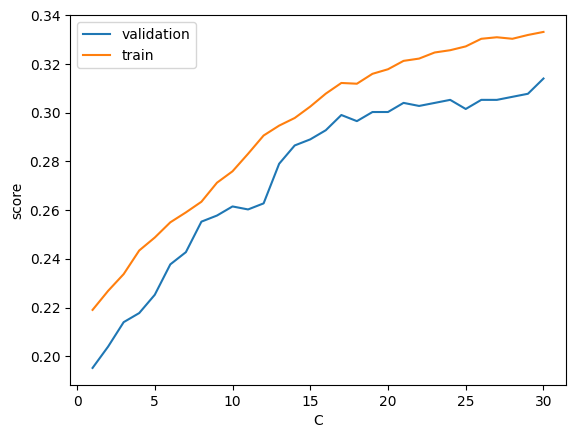

In [4]:
print('Train score : ', model_svm.score(X_train,y_train))
print('Test score : ', model_svm.score(X_test,y_test))

k_3 = np.arange(1,31)
tr_score_3, val_score_3 = validation_curve(estimator=model_svm, X=X_train, y=y_train, cv = 5, param_name='C', param_range=k_3) # , 'C', k_3,

# 5 splits sets de cross validation, on fait la moyenne des scores obtenus sur chacun des 5 splits

train = model_svm.predict(X_train)
predictions = model_svm.predict(X_test)

plt.plot(k_3, val_score_3.mean(axis = 1), label = 'validation')
plt.plot(k_3, tr_score_3.mean(axis = 1), label = 'train')

plt.ylabel('score')
plt.xlabel('C')
plt.legend()